In [975]:
# Draw graphs
import networkx as nx
import matplotlib.pyplot as plt
import yaml
import numpy as np
import pandas as pd
from pathlib import Path

In [976]:
graph = 'graph_7'
run_name = 'graph_16_8'
save_path = 'plots/' + run_name + '/'
file_path = 'conf/topologies/' + run_name + '/'#NEED TO READ ALL FILES
num_agents = 20
num_islands = 4

In [977]:
with open(file_path+graph+'.yaml', 'r') as file:
    tplgy = yaml.safe_load(file)
num_clients = tplgy['num_clients']
vcid = np.arange(num_clients) #Client IDs
topology = []
for cli_ID in vcid:
    topology.append(tplgy['pools']['p'+str(cli_ID)])

In [978]:
source = []
target = []
for i in range(num_agents-num_islands):
    source.append([i] * (len(topology[i])-1))
    target.append(topology[i][1:])
flat_source = [element for innerList in source for element in innerList]
flat_target = [element for innerList in target for element in innerList]

In [979]:
data = {'source': flat_source,
        'target': flat_target}
df = pd.DataFrame(data)

In [980]:
print(flat_target)

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 0, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 14, 15, 0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 15, 0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 0, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 0, 1, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14, 15, 0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]


In [981]:
G = nx.Graph() # Create an empty undirected graph (or nx.DiGraph() for a directed graph)
# Add nodes from the 'source' and 'target' columns
G.add_nodes_from(df['source'])
G.add_nodes_from(df['target'])
# Add edges from the DataFrame
edges = [(row['source'], row['target']) for index, row in df.iterrows()]
G.add_edges_from(edges)

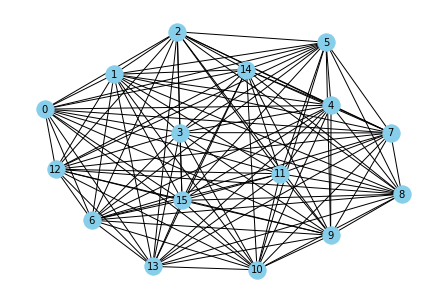

In [982]:
# Draw the graph
pos = nx.spring_layout(G) # Define the layout for node positioning
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
Path(save_path).mkdir(parents=True, exist_ok=True)
plt.savefig(save_path+ graph +'.pdf')
# Display the graph
plt.show()
